In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
country=pd.read_excel("Country-Code.xlsx")
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
zomato=pd.read_excel("zomato.xlsx")
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df=pd.merge(zomato, country)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
no of unique values 9551
*****************
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
no of unique values 7446
*****************
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
no of unique values 15
*****************
New Delhi       5473
Gurgaon         1118
Noida           1080
Fari

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

# Preparing the data

    Dropping off columns Restaurant ID, Restaurant Name & Address- No use in machine learning
    Country Code- country name has been added.
    Locality is already present.
    Switch to order menu- has only one unique value.

In [10]:
df1=df.drop(["Restaurant ID","Restaurant Name","Address","Country Code","Locality","Switch to order menu"],axis=1)

In [11]:
df1

,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Makati City,"Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Makati City,"Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,ÛÁstanbul,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,ÛÁstanbul,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,ÛÁstanbul,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,ÛÁstanbul,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


# EDA

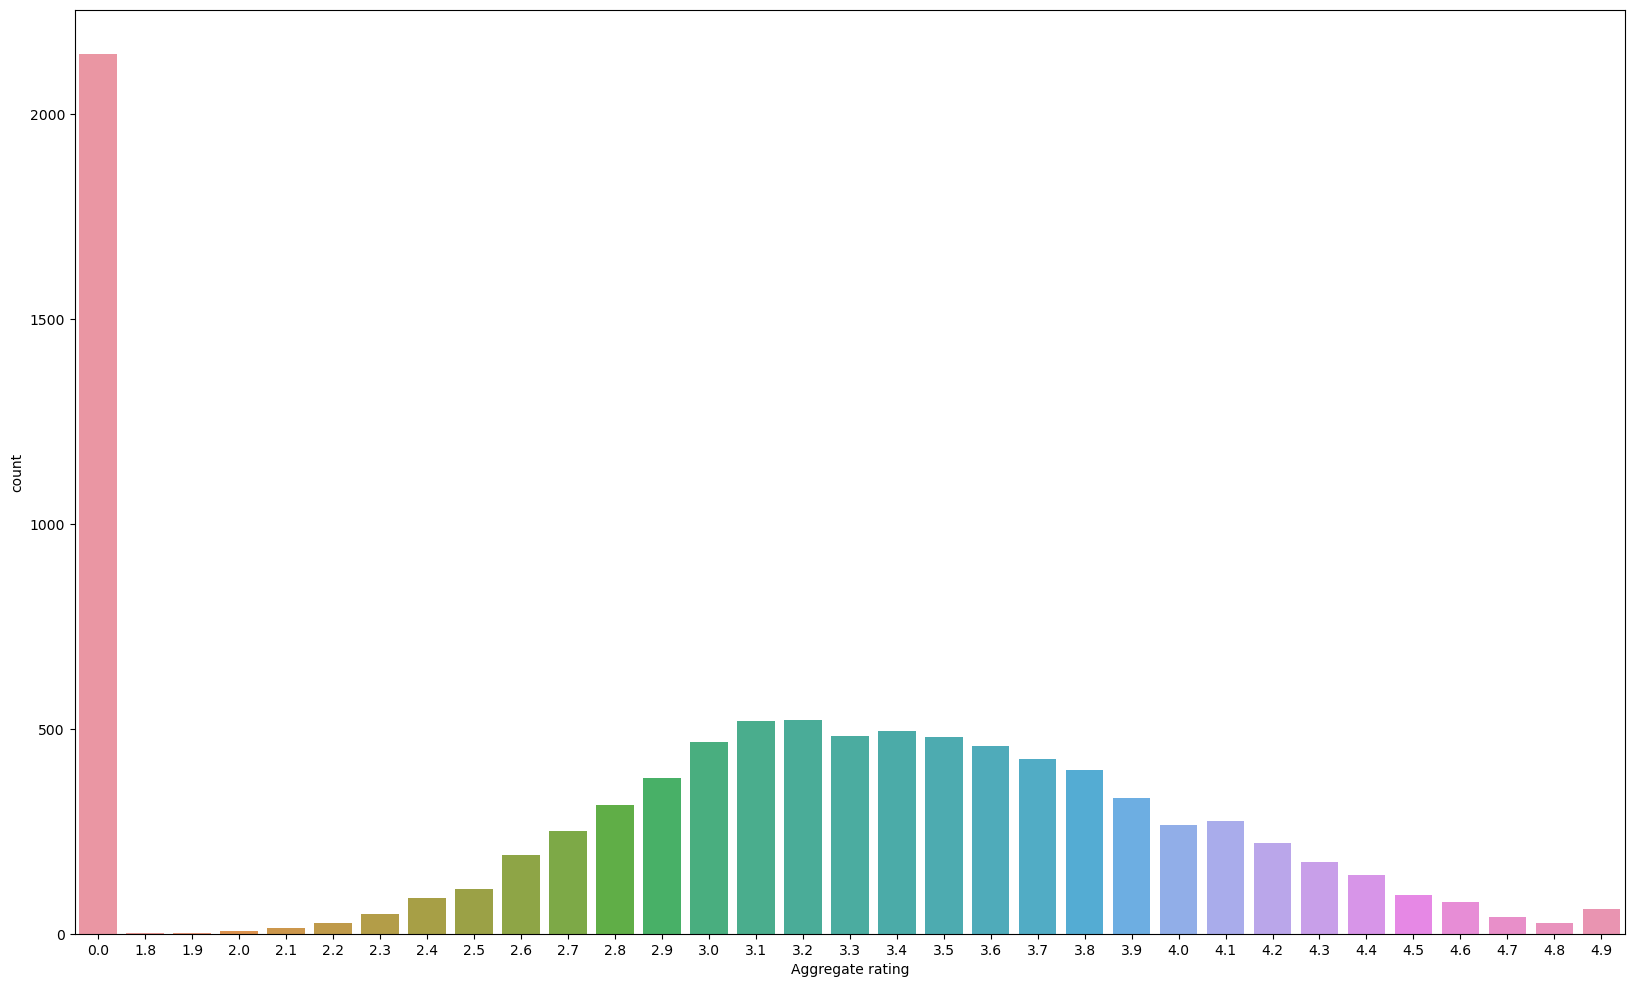

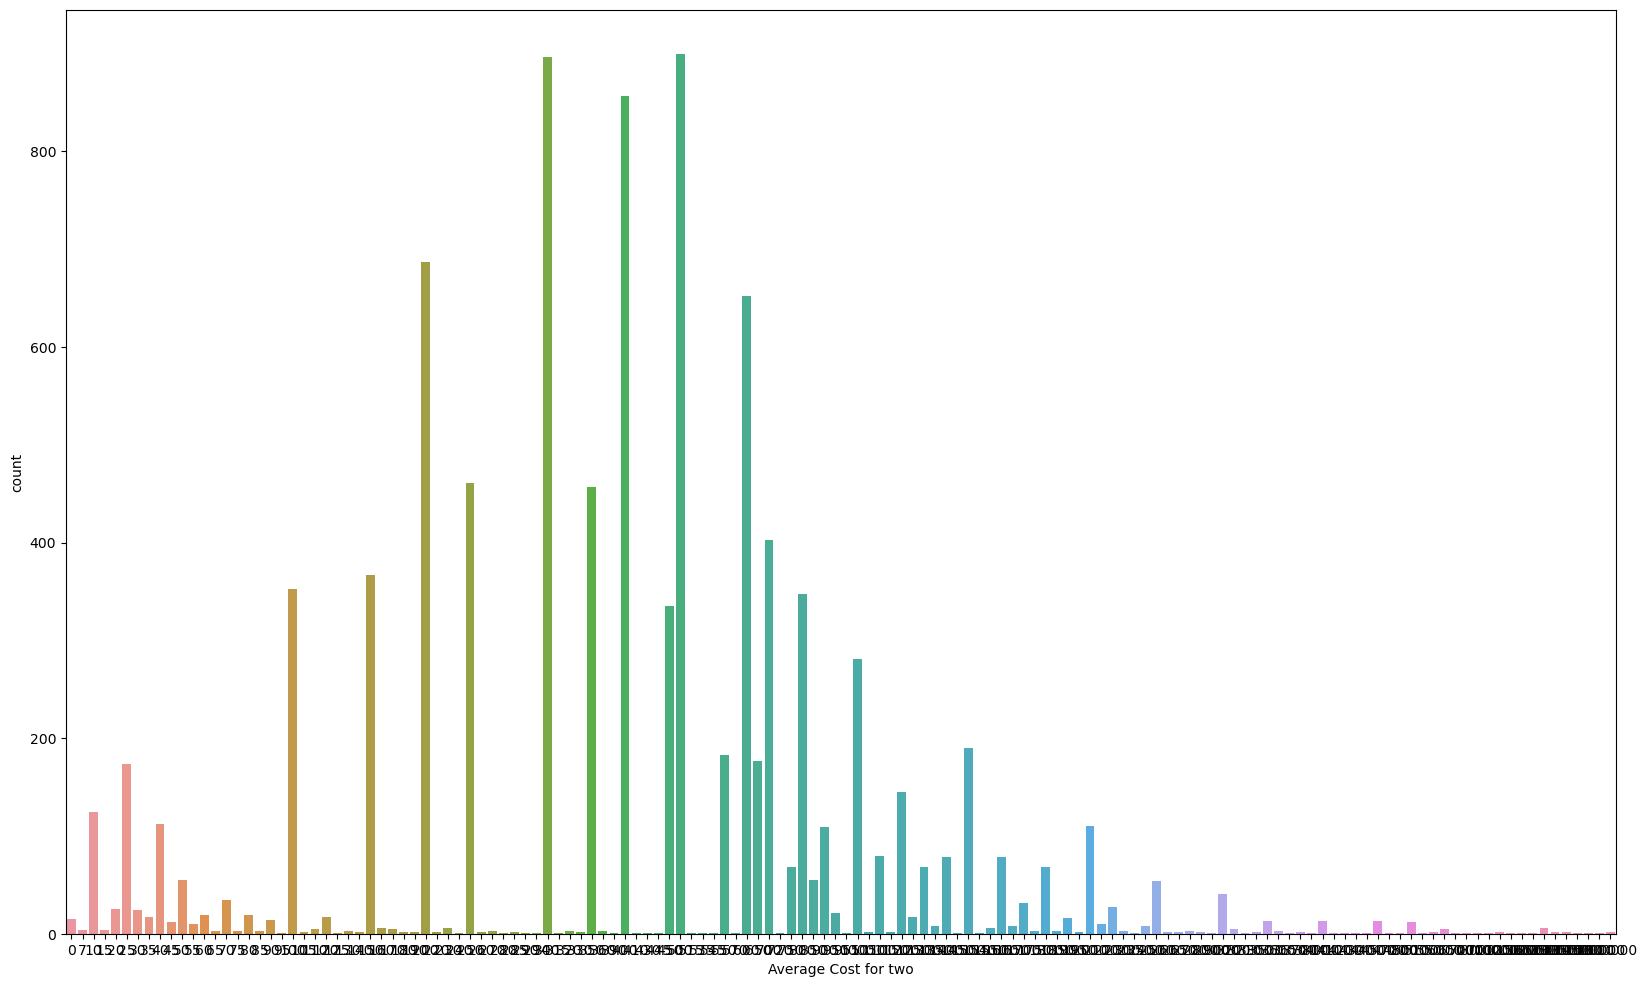

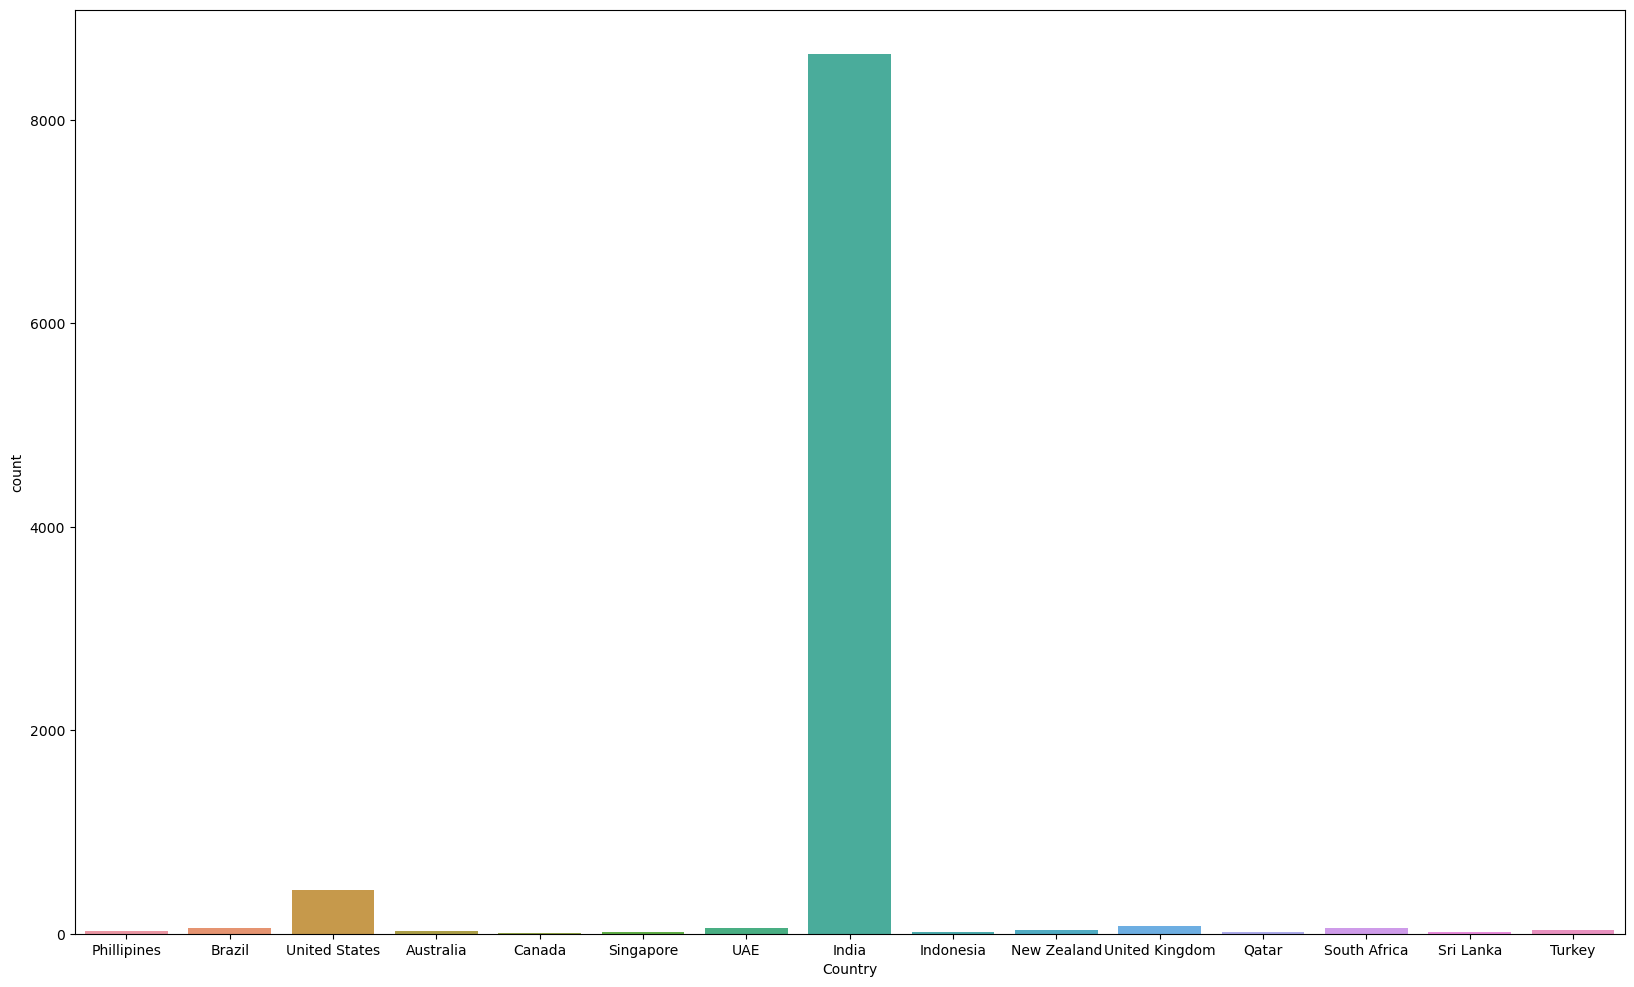

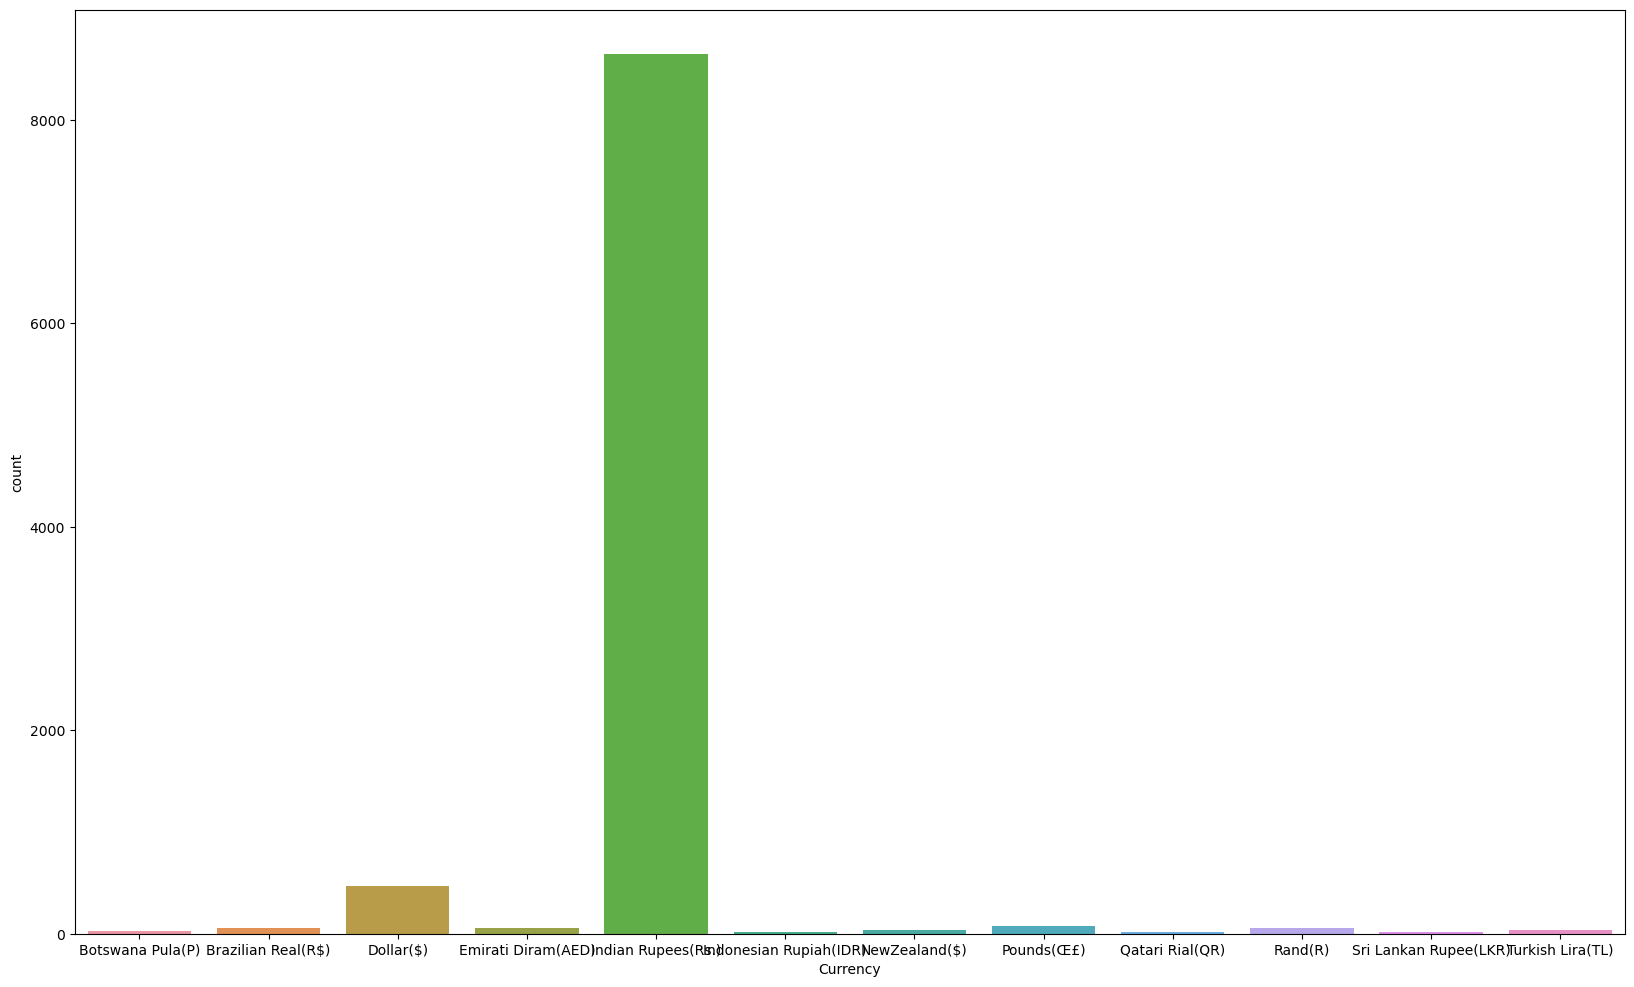

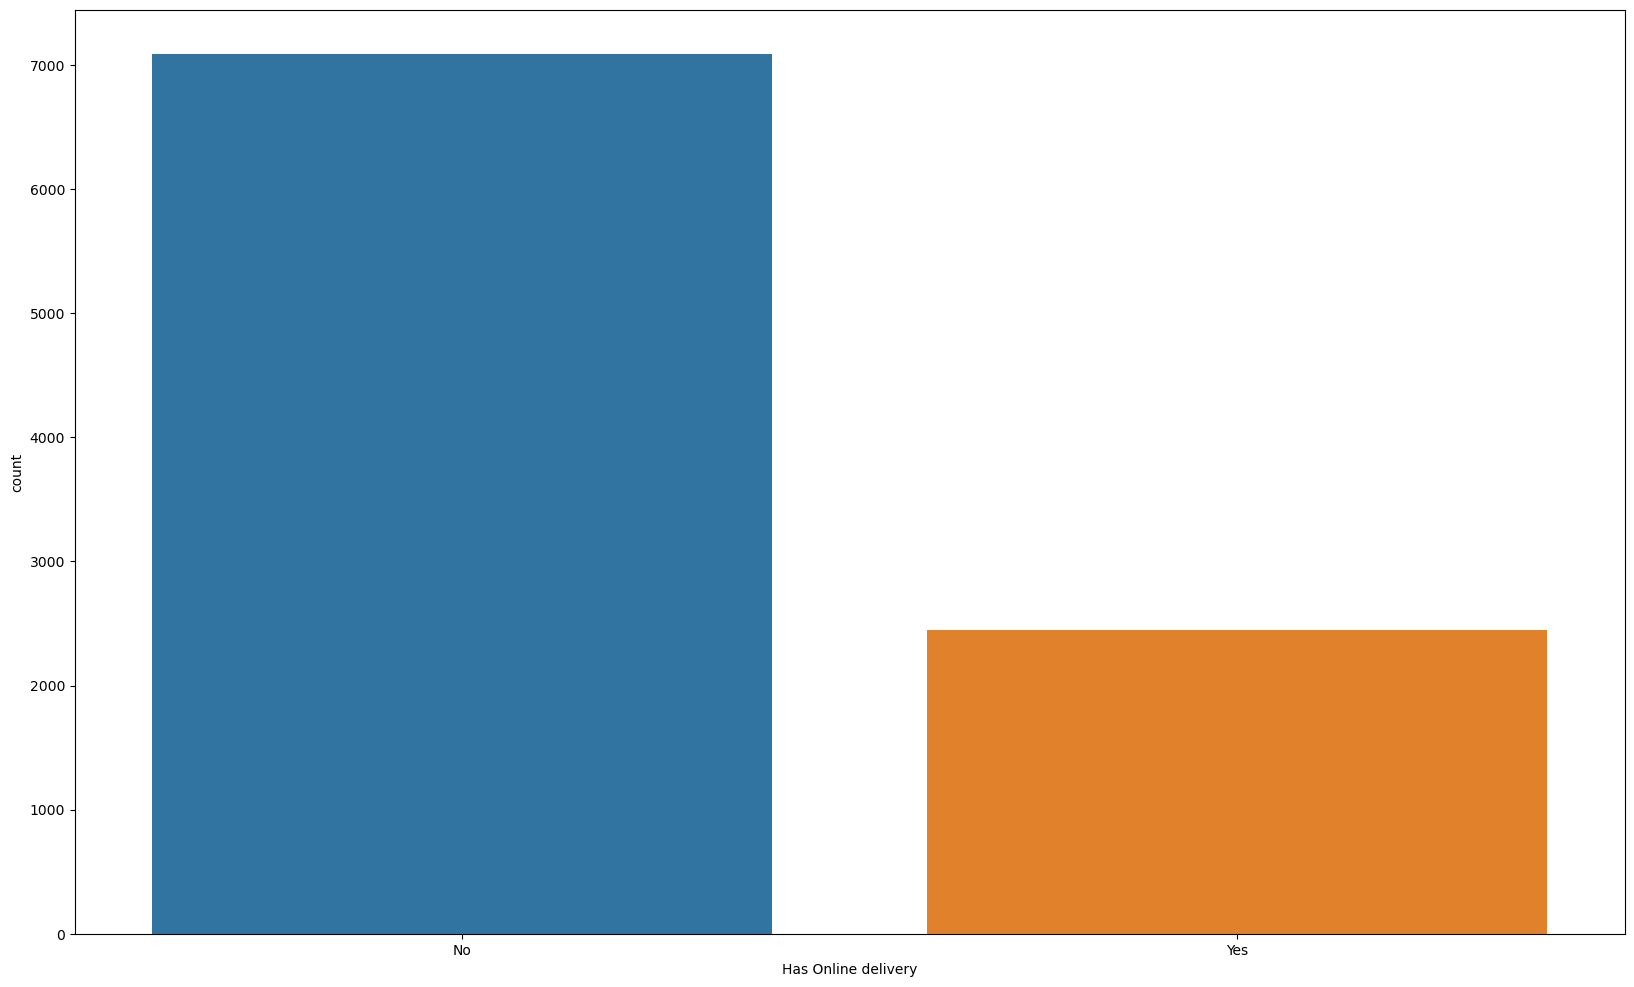

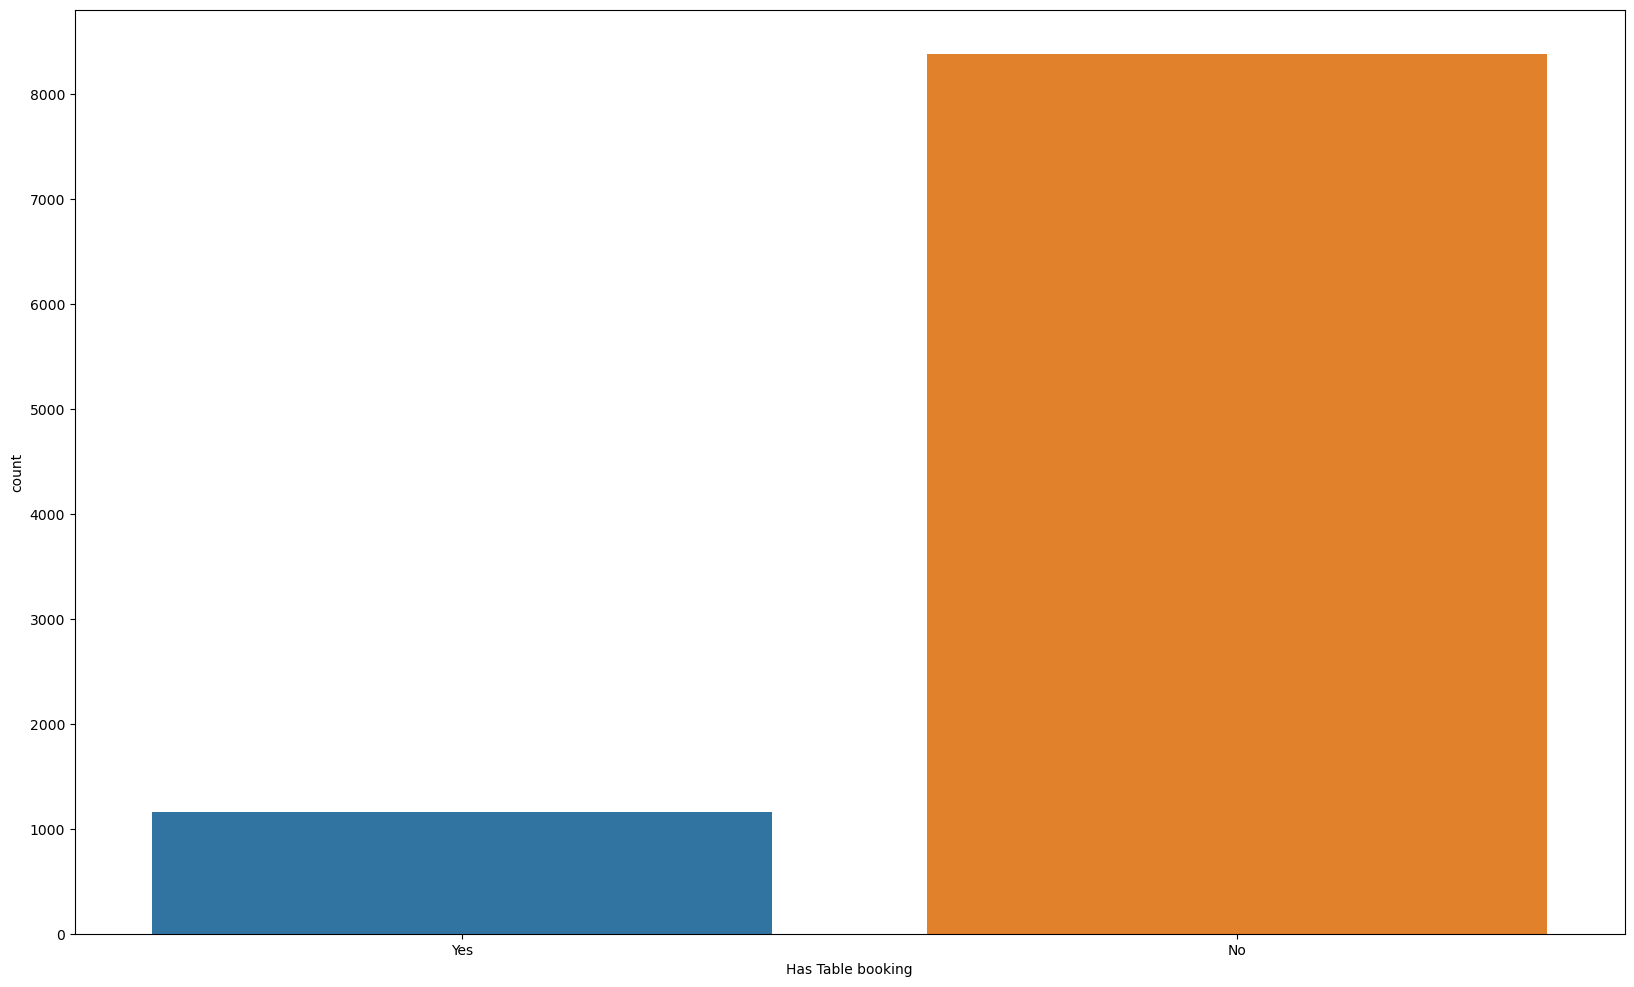

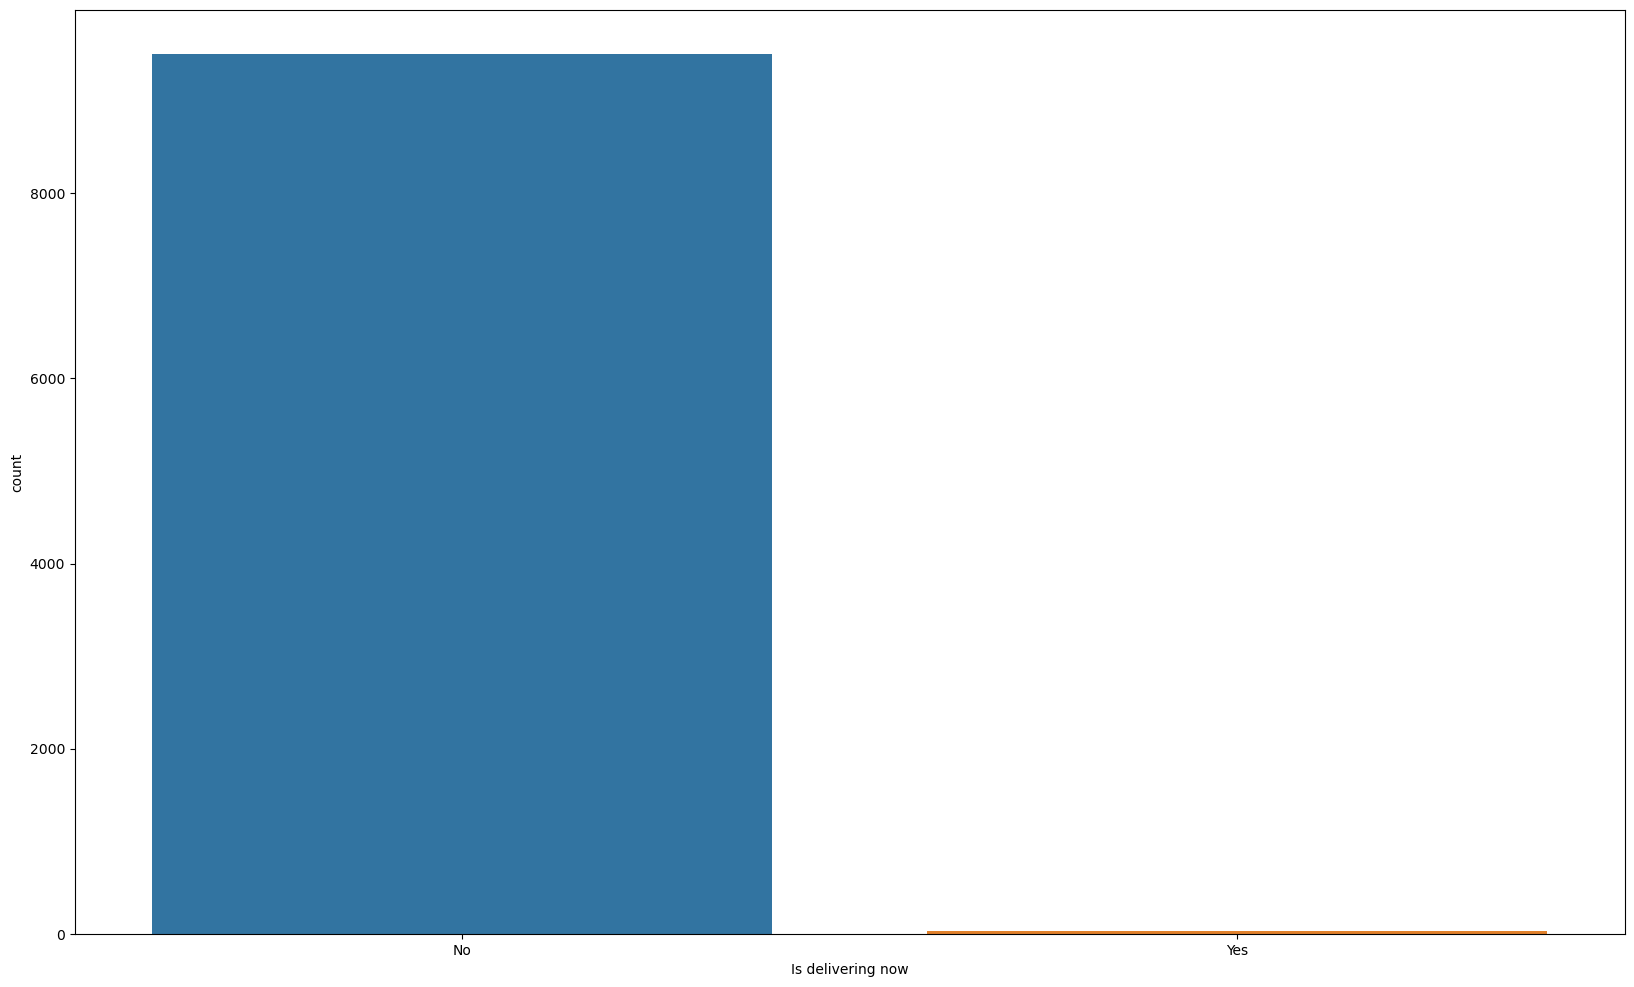

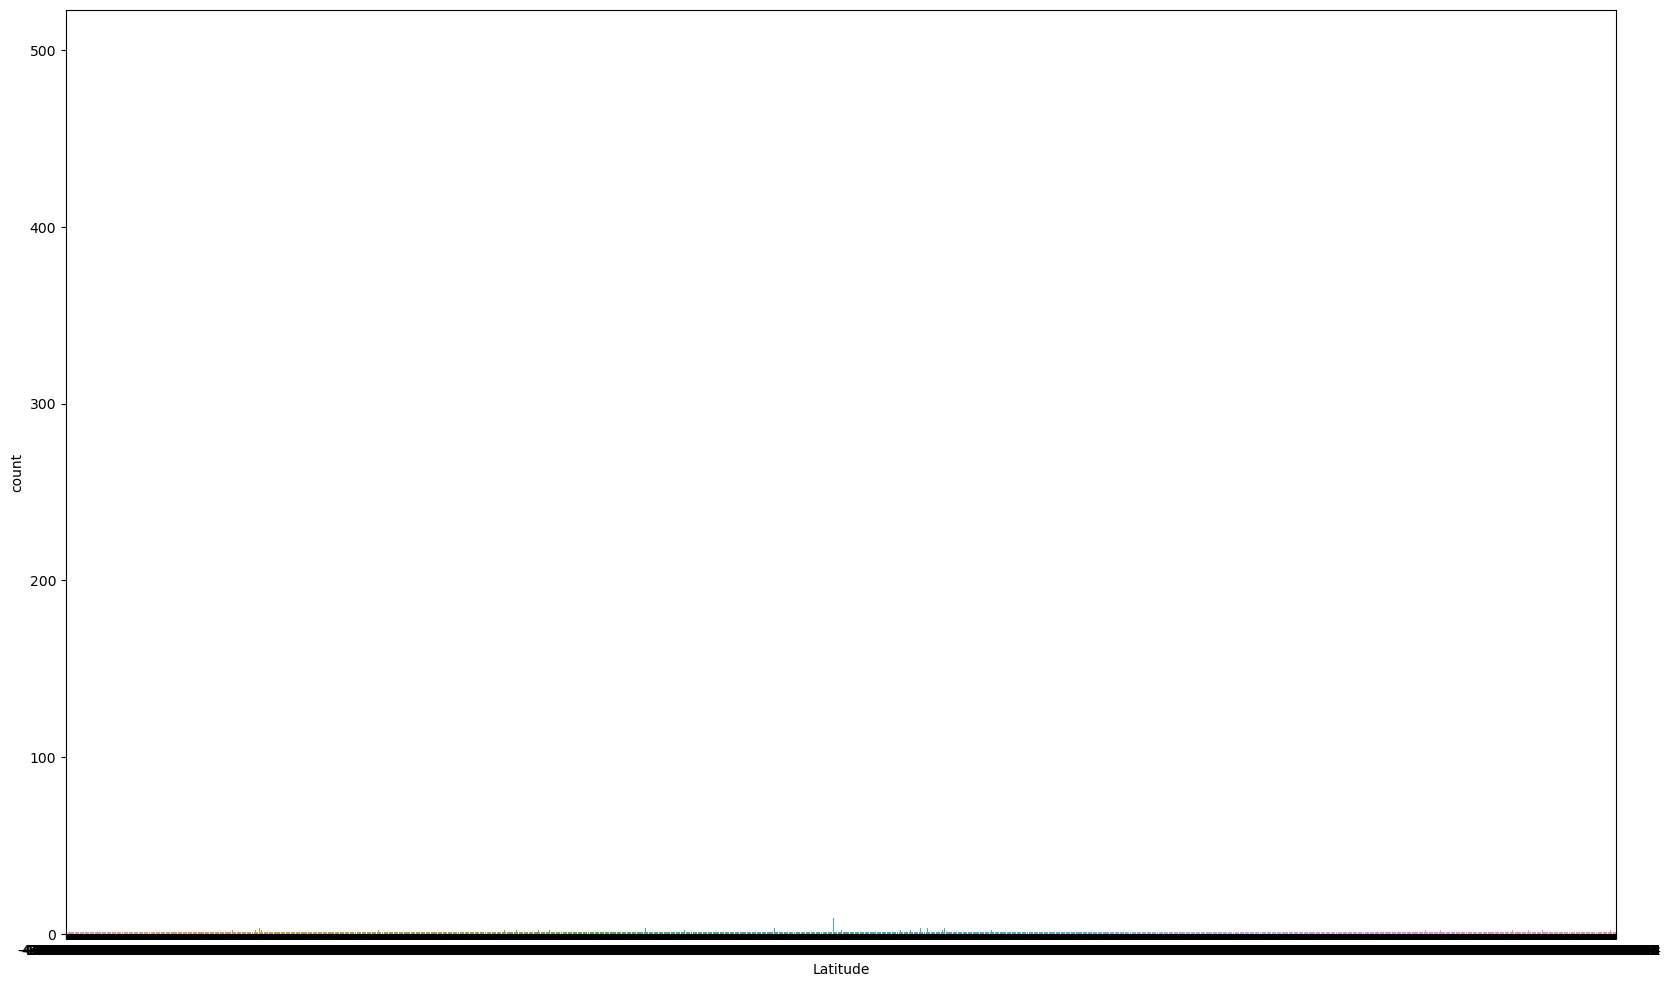

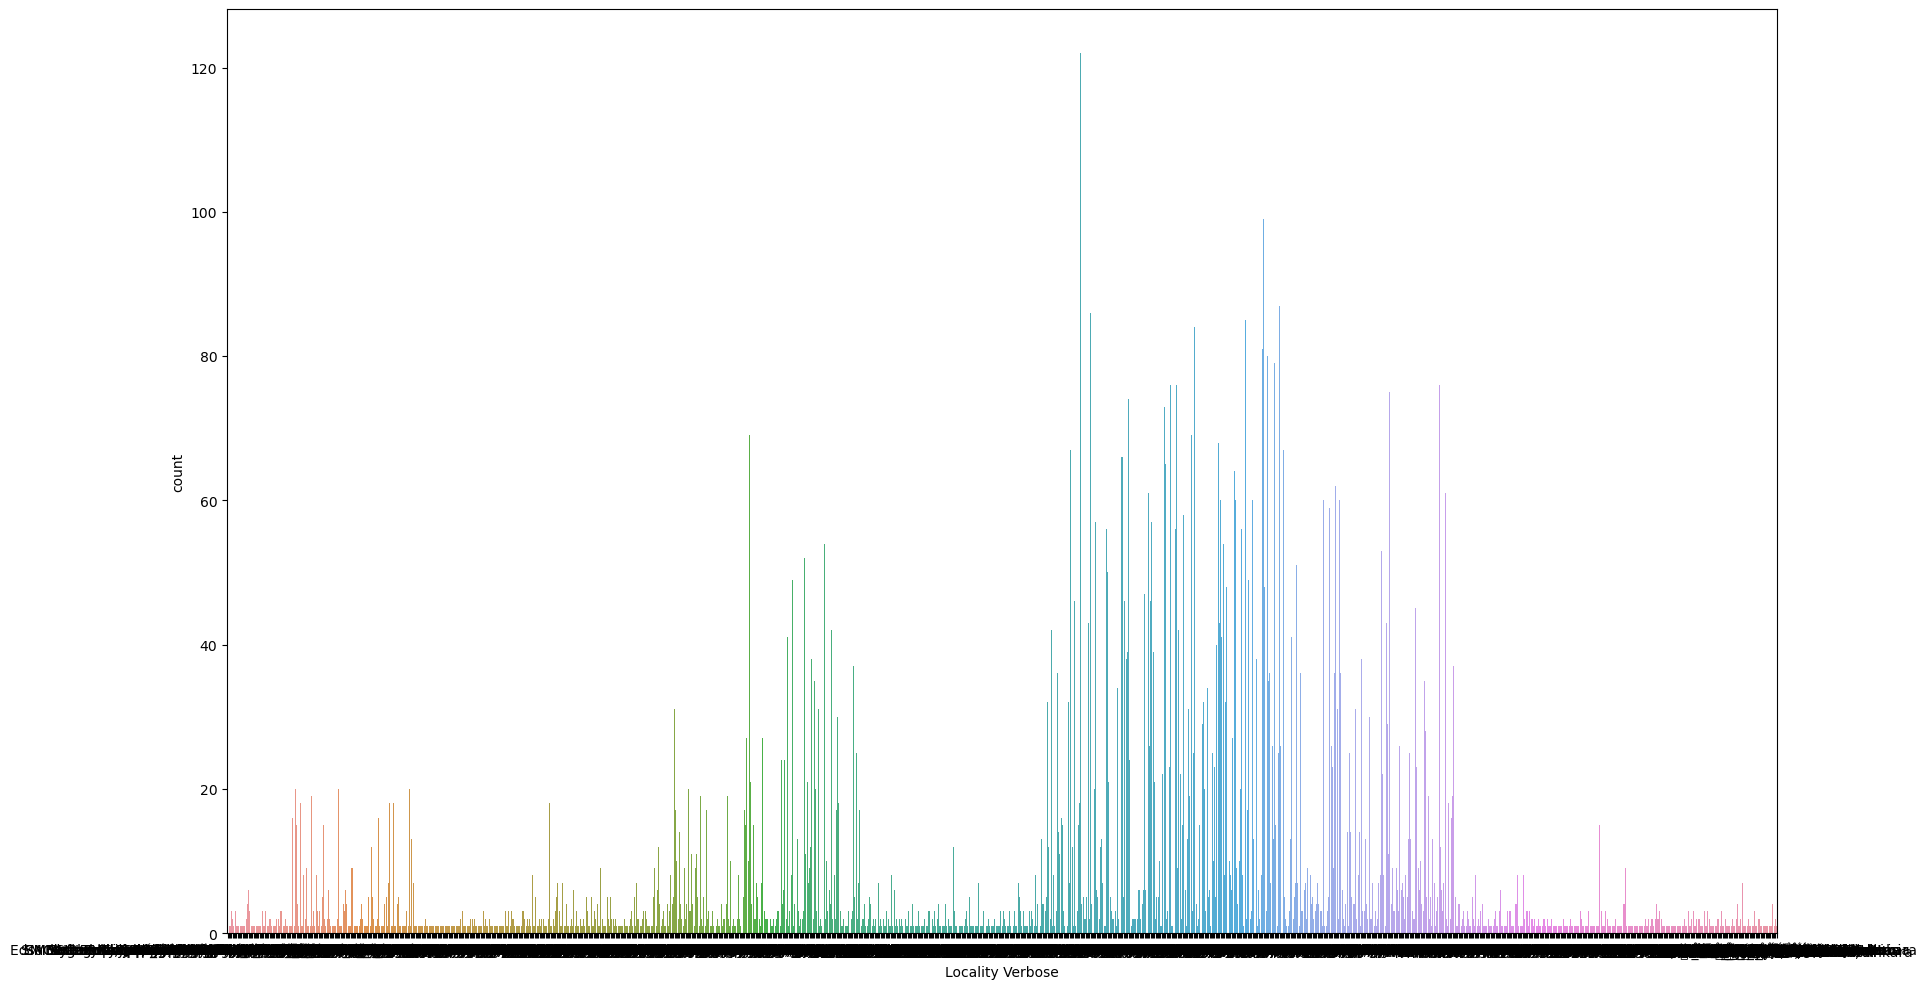

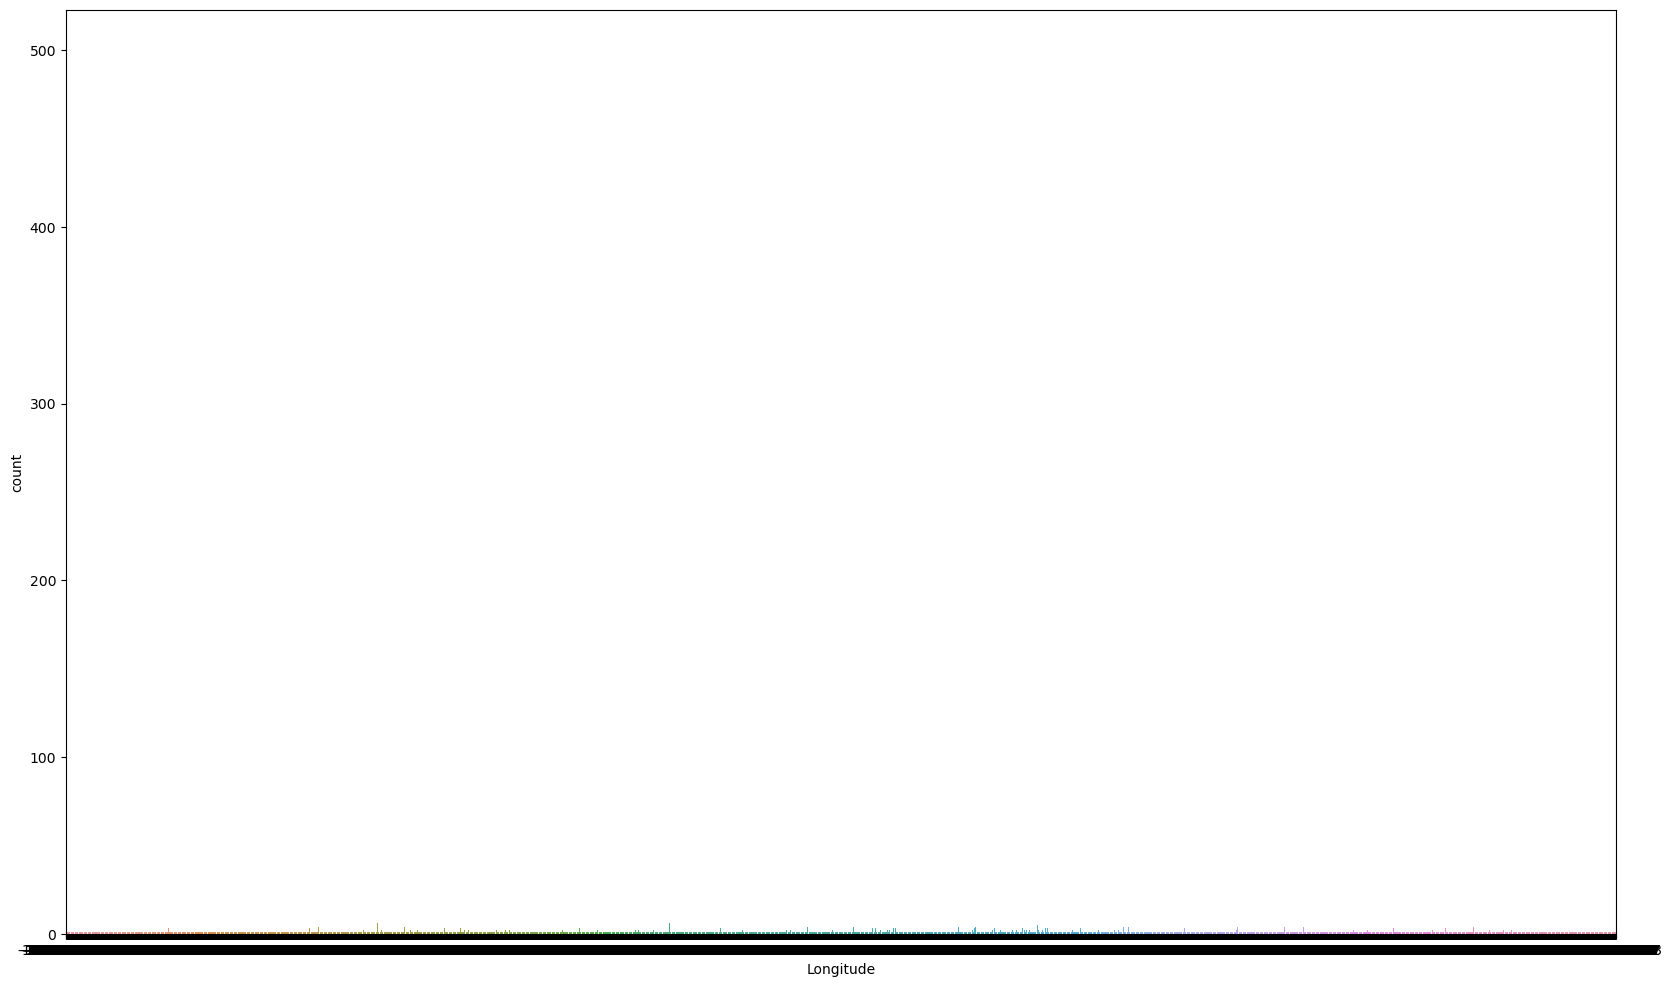

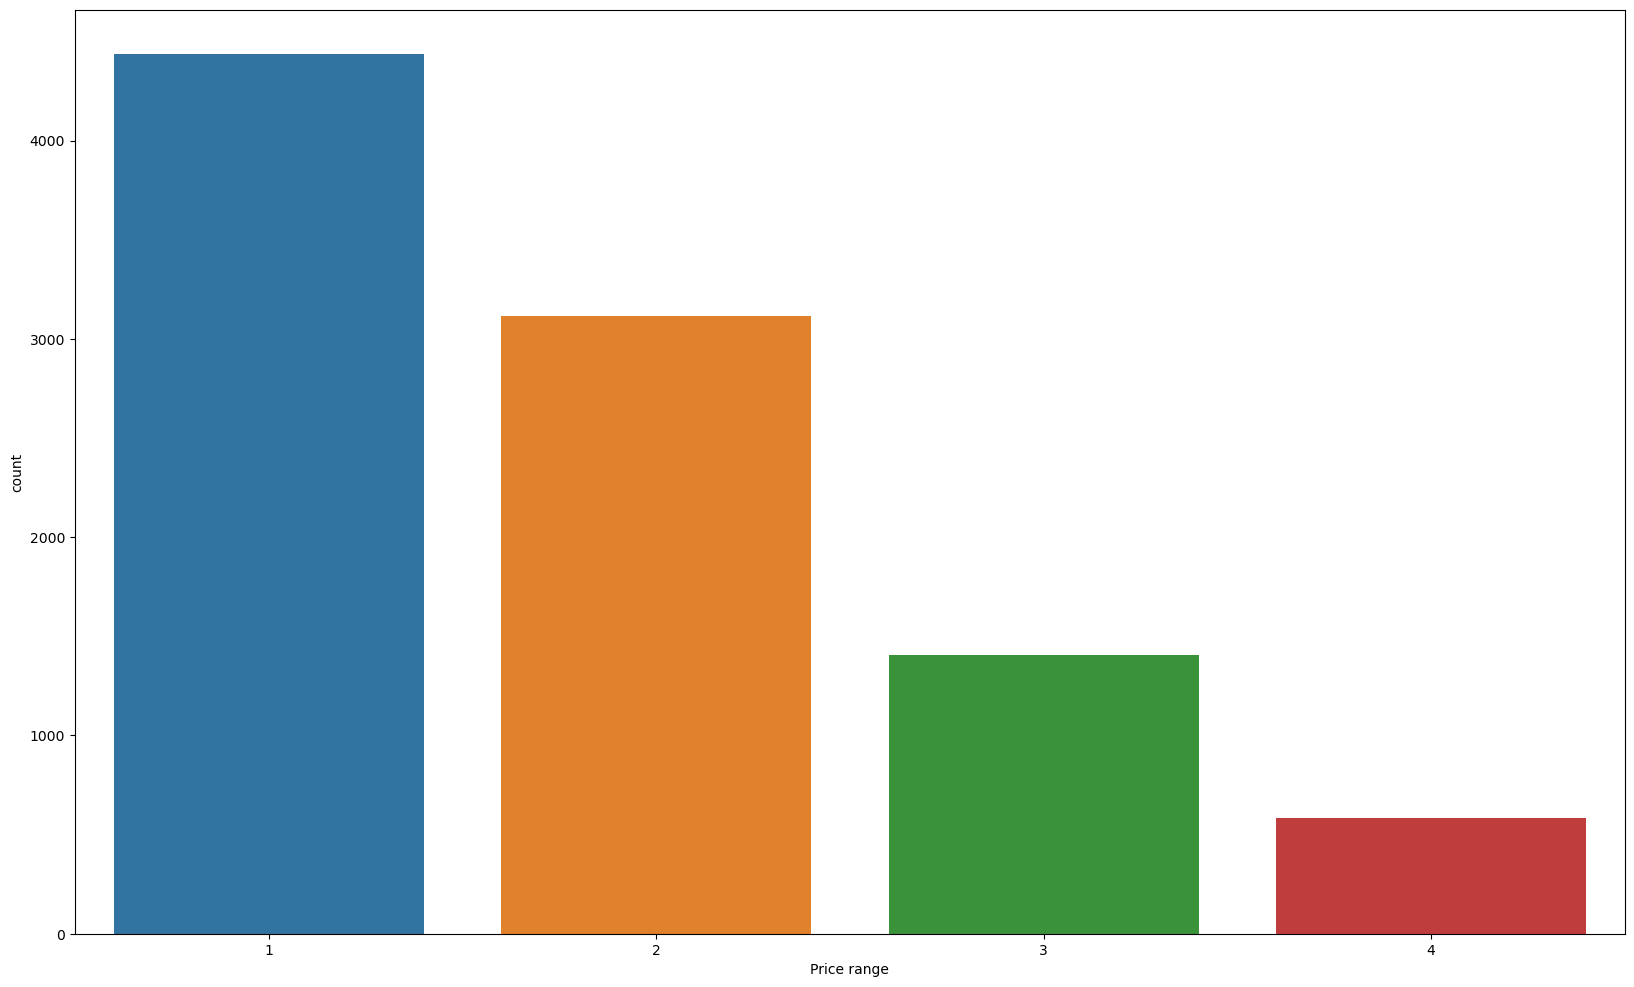

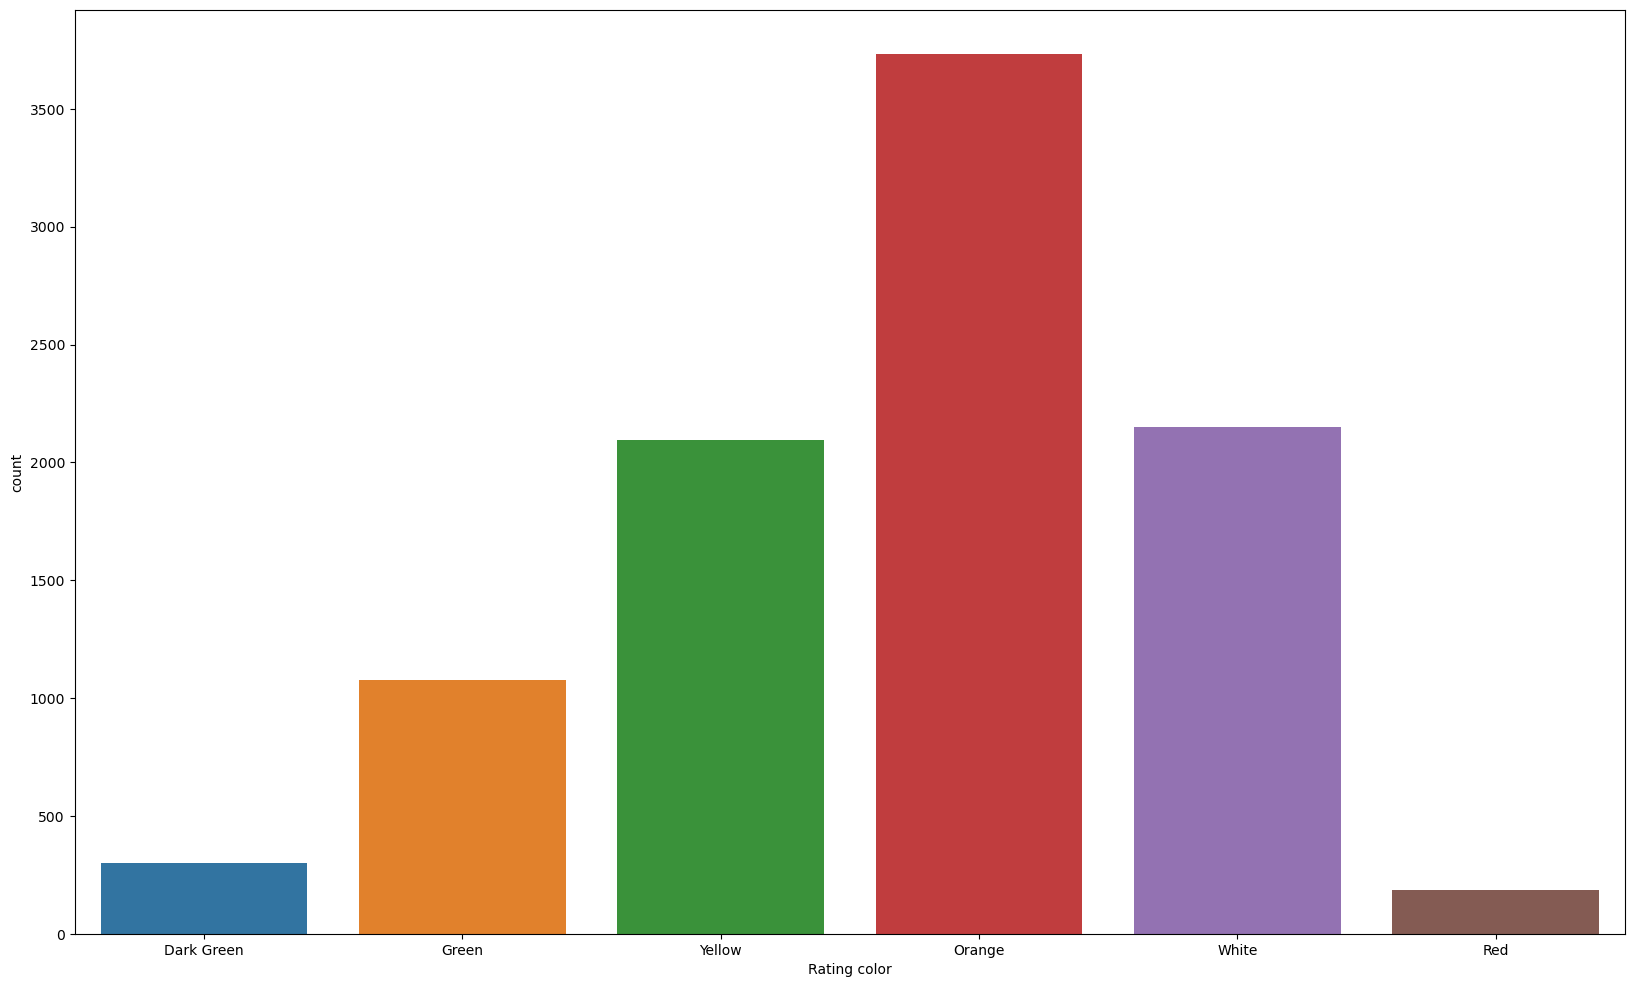

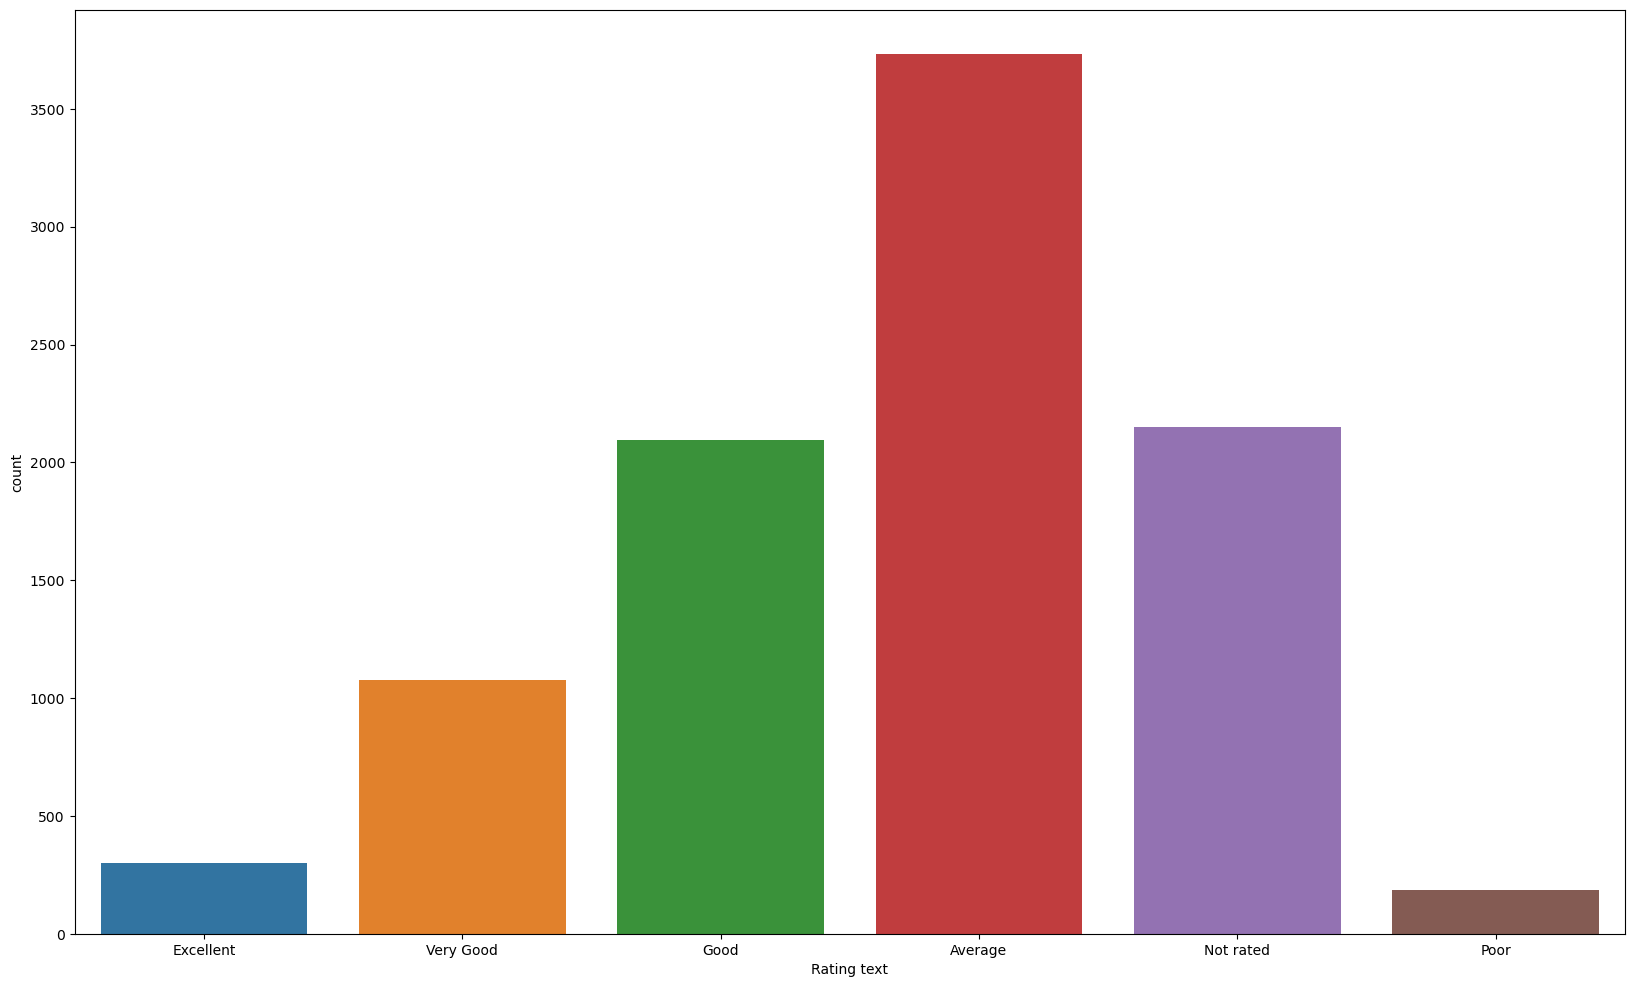

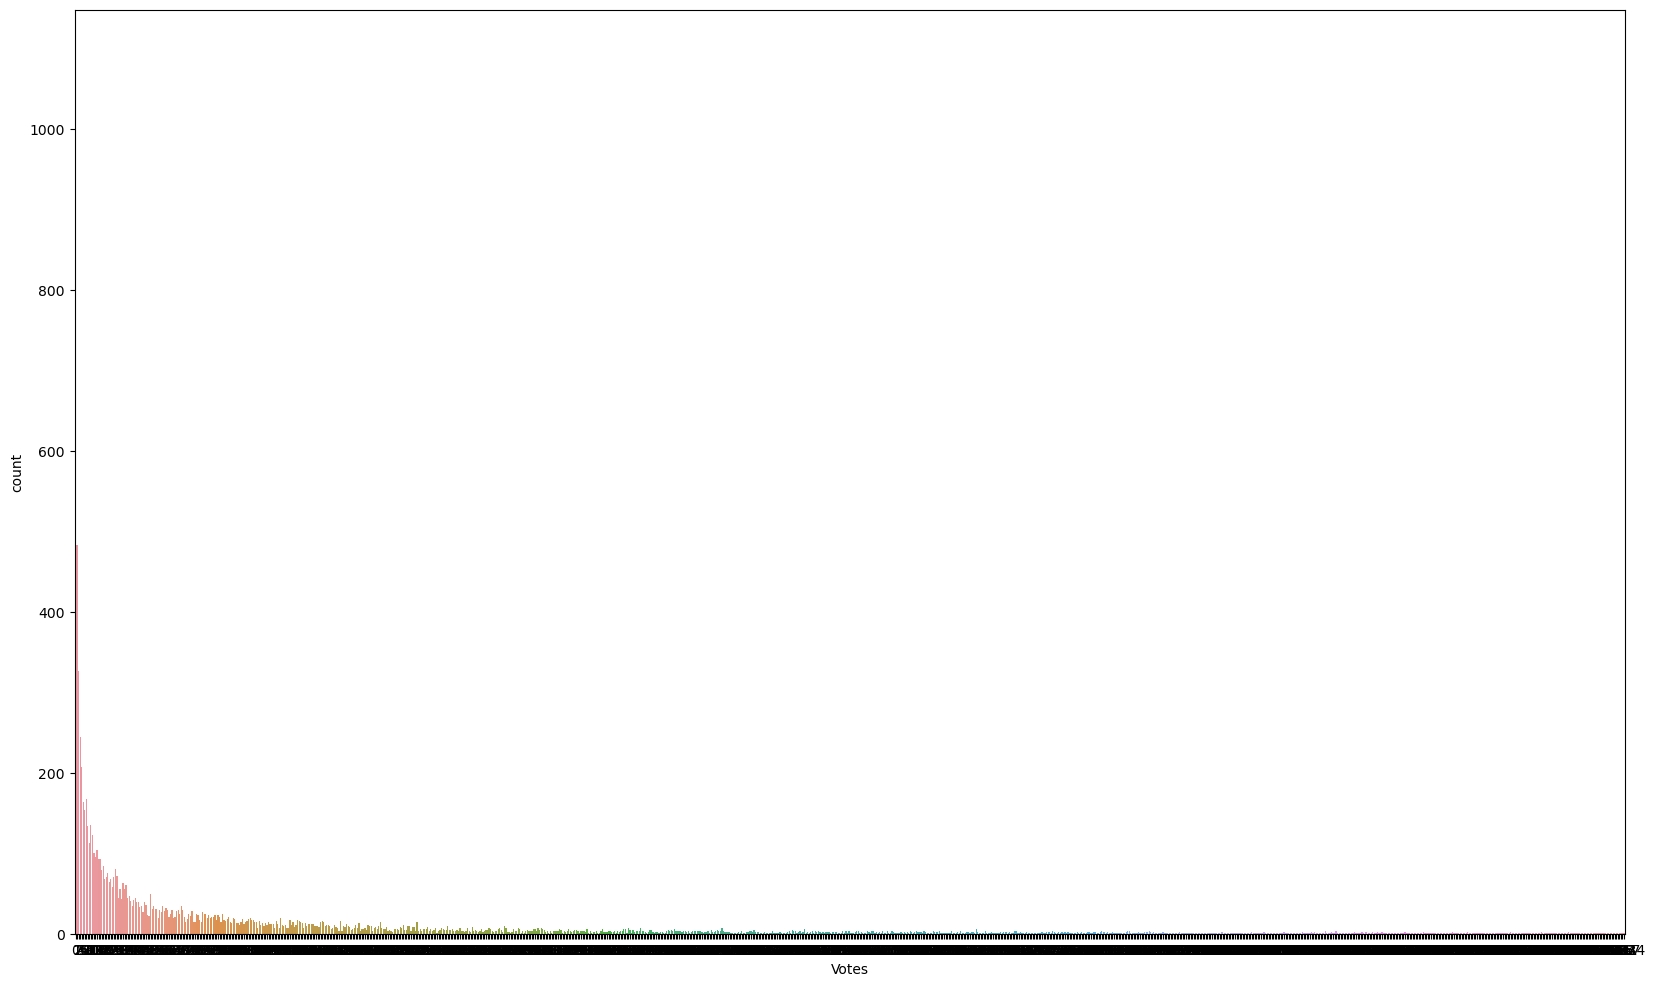

In [14]:
# Check count of categorical data
for i in df1.columns.difference(['Restaurant Name','Cuisines','City','Address','Locality']):
    plt.figure(figsize=(20,12))
    sns.countplot(df1[i])
    plt.show()

    Most restaurants in the dataset are from india (90%).

    Most reataurants has niether online delivery nor table booking.

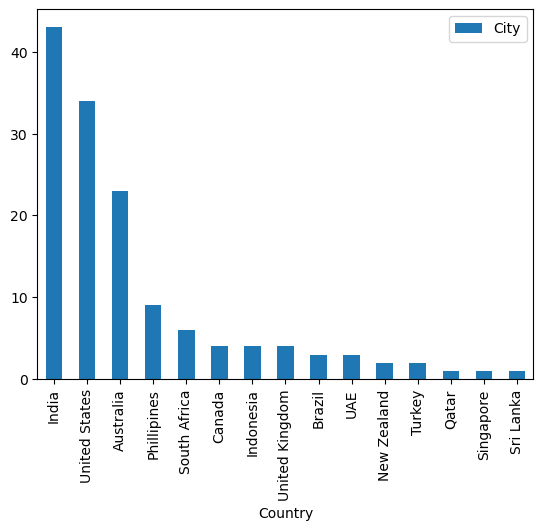

In [15]:
# country vs cities
df1.groupby(['Country'])['City'].nunique().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.show()

Zomato is present in 43 cities in India and 35 in the USA and 23 in Australia and the rest are the 12 cities. So it validates the previous assumption that India and USA can be compared.

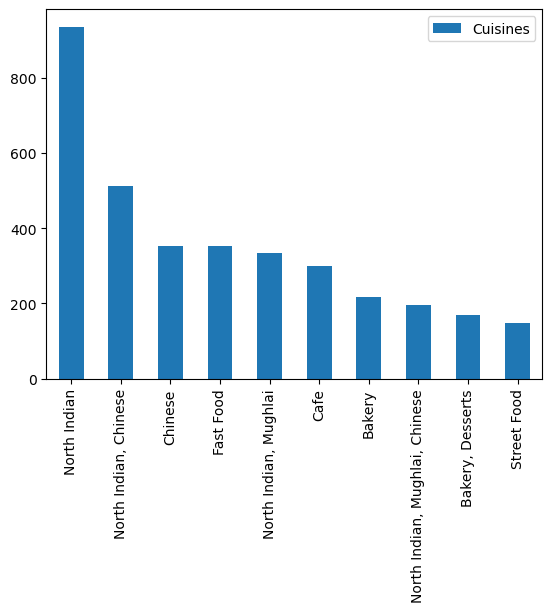

In [16]:
#cuisines

df1['Cuisines'].value_counts().head(10).plot(kind='bar',legend=True)
plt.show()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9542 non-null   object 
 1   Locality Verbose      9542 non-null   object 
 2   Longitude             9542 non-null   float64
 3   Latitude              9542 non-null   float64
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9542 non-null   int64  
 6   Currency              9542 non-null   object 
 7   Has Table booking     9542 non-null   object 
 8   Has Online delivery   9542 non-null   object 
 9   Is delivering now     9542 non-null   object 
 10  Price range           9542 non-null   int64  
 11  Aggregate rating      9542 non-null   float64
 12  Rating color          9542 non-null   object 
 13  Rating text           9542 non-null   object 
 14  Votes                 9542 non-null   int64  
 15  Country              

### converting categorical to numerical

In [20]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['City']=le.fit_transform(df1['City'])
df1['Locality Verbose']=le.fit_transform(df1['Locality Verbose'])
df1['Cuisines']=le.fit_transform(df1['Cuisines'])
df1['Currency']=le.fit_transform(df1['Currency'])
df1['Has Table booking']=le.fit_transform(df1['Has Table booking'])
df1['Has Online delivery']=le.fit_transform(df1['Has Online delivery'])
df1['Is delivering now']=le.fit_transform(df1['Is delivering now'])
df1['Rating color']=le.fit_transform(df1['Rating color'])
df1['Rating text']=le.fit_transform(df1['Rating text'])
df1['Country']=le.fit_transform(df1['Country'])

In [22]:
# use Z-score method
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn


,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,117,107,103.860005,1.282661,515,300,2,0,0,0,4,3.4,2,0,34,8
545,117,108,103.859422,1.285477,102,270,2,0,0,0,4,4.0,1,5,33,8
546,117,160,103.840360,1.279420,922,500,2,0,0,0,4,3.8,5,2,33,8
547,117,189,103.841669,1.280503,6,80,2,0,0,0,4,3.1,2,0,34,8
548,117,201,103.853605,1.293221,916,430,2,0,0,0,4,3.8,5,2,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,133,882,83.361377,17.764287,748,600,4,0,0,0,2,3.6,5,2,193,3
9272,133,1045,0.000000,0.000000,465,400,4,0,0,0,2,3.7,5,2,85,3
9273,133,1045,83.315281,17.719539,322,600,4,0,0,0,2,4.3,1,5,172,3
9274,133,1132,83.336840,17.721182,88,1500,4,0,0,0,4,3.8,5,2,74,3


### Scaling of Independent features

In [23]:
X=dfn.drop("Average Cost for two",axis=1)
y=dfn["Average Cost for two"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [25]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.7561723977858549
At random state 0, The test accuracy is :0.699770329512251


At random state 1, The training accuracy is :0.7435680109487723
At random state 1, The test accuracy is :0.7233799374193502


At random state 2, The training accuracy is :0.7473385301460292
At random state 2, The test accuracy is :0.7163656331258792


At random state 3, The training accuracy is :0.723664713244775
At random state 3, The test accuracy is :0.7683124462289626


At random state 4, The training accuracy is :0.7439961842325383
At random state 4, The test accuracy is :0.7204142672856935


At random state 5, The training accuracy is :0.7340071552261256
At random state 5, The test accuracy is :0.7388443901506356


At random state 6, The training accuracy is :0.7346023165772658
At random state 6, The test accuracy is :0.7401946142194522


At random state 7, The training accuracy is :0.7303834401488176
At random state 7, The test accuracy is :0.7496729858012

    At random state 8, The training accuracy is :0.718768854919567
    At random state 8, The test accuracy is :0.777340998115184

In [26]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=8)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(5632, 15) (5632,)
(2775, 15) (2775,)


## Model Building

In [27]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [28]:
model=[lr,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 164.5436031548688
Mean Squared Error: 68596.1955870155
Root Mean Squared Error: 261.90875431534454
R squared score:  0.777340998115184
Cross Validation Score is : [0.73939425 0.73257102 0.67769228 0.67173395 0.77516825]
Mean Score : 0.7193119498346193
Difference : -0.058029048280564655


Scores for SVR() are
Mean Absolute Error: 229.54395198834612
Mean Squared Error: 213684.86822868892
Root Mean Squared Error: 462.26060639934366
R squared score:  0.30639215381363727
Cross Validation Score is : [0.21790096 0.23957143 0.22258349 0.20338258 0.26560285]
Mean Score : 0.22980826186999342
Difference : -0.07658389194364384


Scores for DecisionTreeRegressor() are
Mean Absolute Error: 147.11891891891892
Mean Squared Error: 104170.72972972973
Root Mean Squared Error: 322.75490659280416
R squared score:  0.6618682638483668
Cross Validation Score is : [0.7770101  0.76008421 0.83829416 0.78283599 0.78726217]
Mean Score : 0.7890973277934568
Diff

RandomForestRegressor has given the best scores, so we will continue with it.

### HYPER PERAMETER TUNING

In [29]:
param ={
       'n_estimators':[50,100,200],
      'criterion':['friedman_mse','poisson'],
     'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
}

In [30]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

RF_grid.best_params_

Fitting 4 folds for each of 24 candidates, totalling 96 fits


{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

### Preparing model with best parameters.

In [31]:
rfr_final = sklearn.ensemble.RandomForestRegressor(n_estimators=50,criterion='friedman_mse',min_samples_split=2,min_samples_leaf=1)

rfr_final.fit(train_x,train_y)
rfr_final.score(train_x,train_y)
pred_final=rfr_final.predict(test_x)

print('R squared score: ', r2_score(pred_final,test_y))
score=cross_val_score(rfr_final,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())
print("Difference :",score.mean()-r2_score(pred_final,test_y))

R squared score:  0.8651208236413047
Cross Validation Score is : [0.88187798 0.86323331 0.85460808 0.87511972 0.89602666]
Mean Score : 0.8741731487493271
Difference : 0.009052325108022341


<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

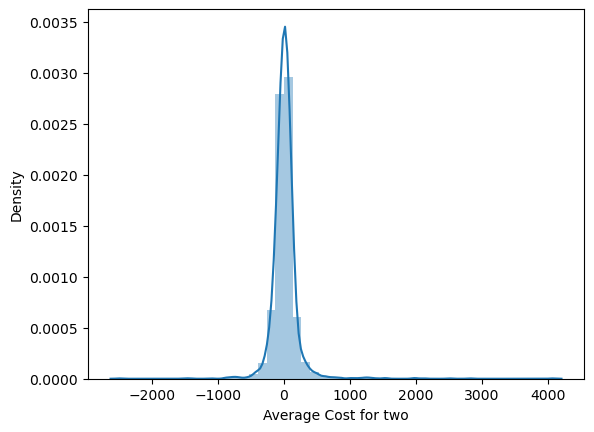

In [32]:
sns.distplot(pred_final-test_y)

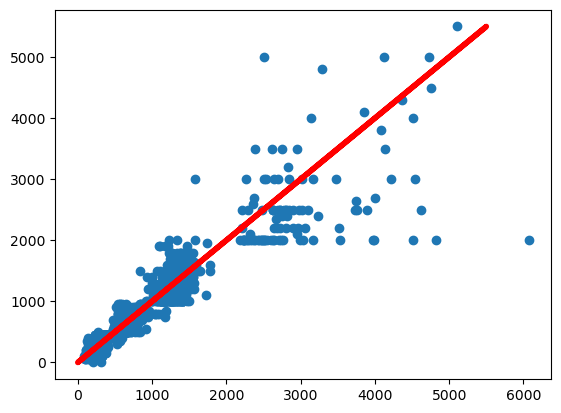

In [33]:
plt.scatter(pred_final,test_y)
plt.plot(test_y,test_y,linewidth=4,color='Red')

## Saving The Model

In [34]:
import joblib
joblib.dump(rfr_final,'zomato_price_rfr.obj')

['zomato_price_rfr.obj']

# Price range

In [36]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",172,121.027535,14.565443,920,...,1,0,0,No,3,4.8,0,1,314,6
1,6304287,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",600,121.014101,14.553708,1111,...,1,0,0,No,3,4.5,0,1,591,6
2,6300002,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",314,121.056831,14.581404,1671,...,1,0,0,No,4,4.4,1,5,270,6
3,6318506,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",873,121.056475,14.585318,1126,...,0,0,0,No,4,4.9,0,1,365,6
4,6314302,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",873,121.057508,14.584450,1122,...,1,0,0,No,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,139,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,522,28.977392,41.022793,1813,...,0,0,0,No,3,4.1,1,5,788,11
9547,5908749,Ceviz AÛôacÛ±,208,139,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,557,29.041297,41.009847,1824,...,0,0,0,No,3,4.2,1,5,1034,11
9548,5915807,Huqqa,208,139,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,560,29.034640,41.055817,1110,...,0,0,0,No,4,3.7,5,2,661,11
9549,5916112,Aôôk Kahve,208,139,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,560,29.036019,41.057979,1657,...,0,0,0,No,4,4.0,1,5,901,11


In [38]:
Xc=dfn.drop("Price range",axis=1)
yc=dfn["Price range"]
st=StandardScaler()
xfc=st.fit_transform(Xc)
xc=pd.DataFrame(data=xfc, columns=Xc.columns)

In [39]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(xc,yc,test_size=0.25,random_state=94)

In [40]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(6305, 15) (6305,)
(2102, 15) (2102,)


In [41]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.9686013320647003 
 [[1068   11    0    0]
 [   7  665   10    0]
 [   0   20  219    5]
 [   0    0   13   84]] 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1079
           2       0.96      0.98      0.97       682
           3       0.90      0.90      0.90       244
           4       0.94      0.87      0.90        97

    accuracy                           0.97      2102
   macro avg       0.95      0.93      0.94      2102
weighted avg       0.97      0.97      0.97      2102
 

Cross Validation Score is : [0.96590008 0.97145123 0.96272799 0.96114195 0.96590008]
Mean Score : 0.9654242664551942


accuracy score for  GaussianNB() is :  0.6503330161750713 
 [[1076    0    3    0]
 [ 612   31   39    0]
 [  30    7  206    1]
 [   1    0   42   54]] 
               precision    recall  f1-score   support

           1       0.63      1.00      0.77      1079
           2     

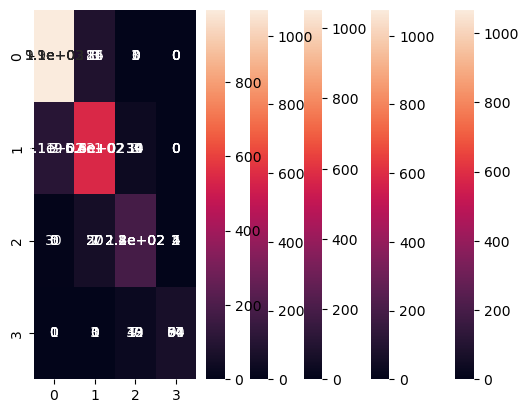

In [42]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

accuracy score for  DecisionTreeClassifier() is :  0.9909609895337773

No need for parameter tuning here.

In [50]:
dtc1= DecisionTreeClassifier()
dtc1.fit(train_x,train_y)
prf=dtc1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(dtc1,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9895337773549001
Cross Validation Score is : [0.98413957 0.98176051 0.97858842 0.98572561 0.98334655]
Mean Score : 0.982712133227597


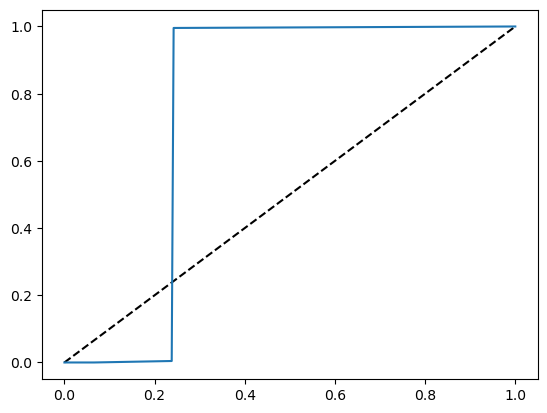

In [51]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=metrics.roc_curve(test_y,prf,pos_label=2)
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)

In [52]:
import joblib
joblib.dump(rf1,"price_range.obj")

['price_range.obj']

In [53]:
model=joblib.load('price_range.obj')

In [54]:
result=model.predict(test_x)

In [55]:
print(accuracy_score(test_y,result))

0.9823977164605138
